In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/2016-08-08-last-year.xz',
                   parse_dates=[16],
                   dtype={'document_id': np.str,
                          'congressperson_id': np.str,
                          'congressperson_document': np.str,
                          'term_id': np.str,
                          'cnpj_cpf': np.str,
                          'reimbursement_number': np.str})

In [3]:
data.head()

,document_id,congressperson_name,congressperson_id,congressperson_document,term,state,party,term_id,subquota_number,subquota_description,...,net_value,month,year,installment,passenger,leg_of_the_trip,batch_number,reimbursement_number,reimbursement_value,applicant_id
0,5886345,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,1,Maintenance of office supporting parliamentary...,...,165.65,11,2015,0,NaN,NaN,1255355,5294,NaN,3074
1,5886361,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,1,Maintenance of office supporting parliamentary...,...,59.48,12,2015,0,NaN,NaN,1255361,5294,NaN,3074
2,5886341,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,1,Maintenance of office supporting parliamentary...,...,130.95,11,2015,0,NaN,NaN,1255355,5294,NaN,3074
3,5928783,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,1,Maintenance of office supporting parliamentary...,...,193.06,12,2015,0,NaN,NaN,1268867,5370,NaN,3074
4,5608486,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,1,Maintenance of office supporting parliamentary...,...,310.25,2,2015,0,NaN,NaN,1168538,4966,NaN,3074


# Find spends: congress person per month

/Users/jucarmona/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


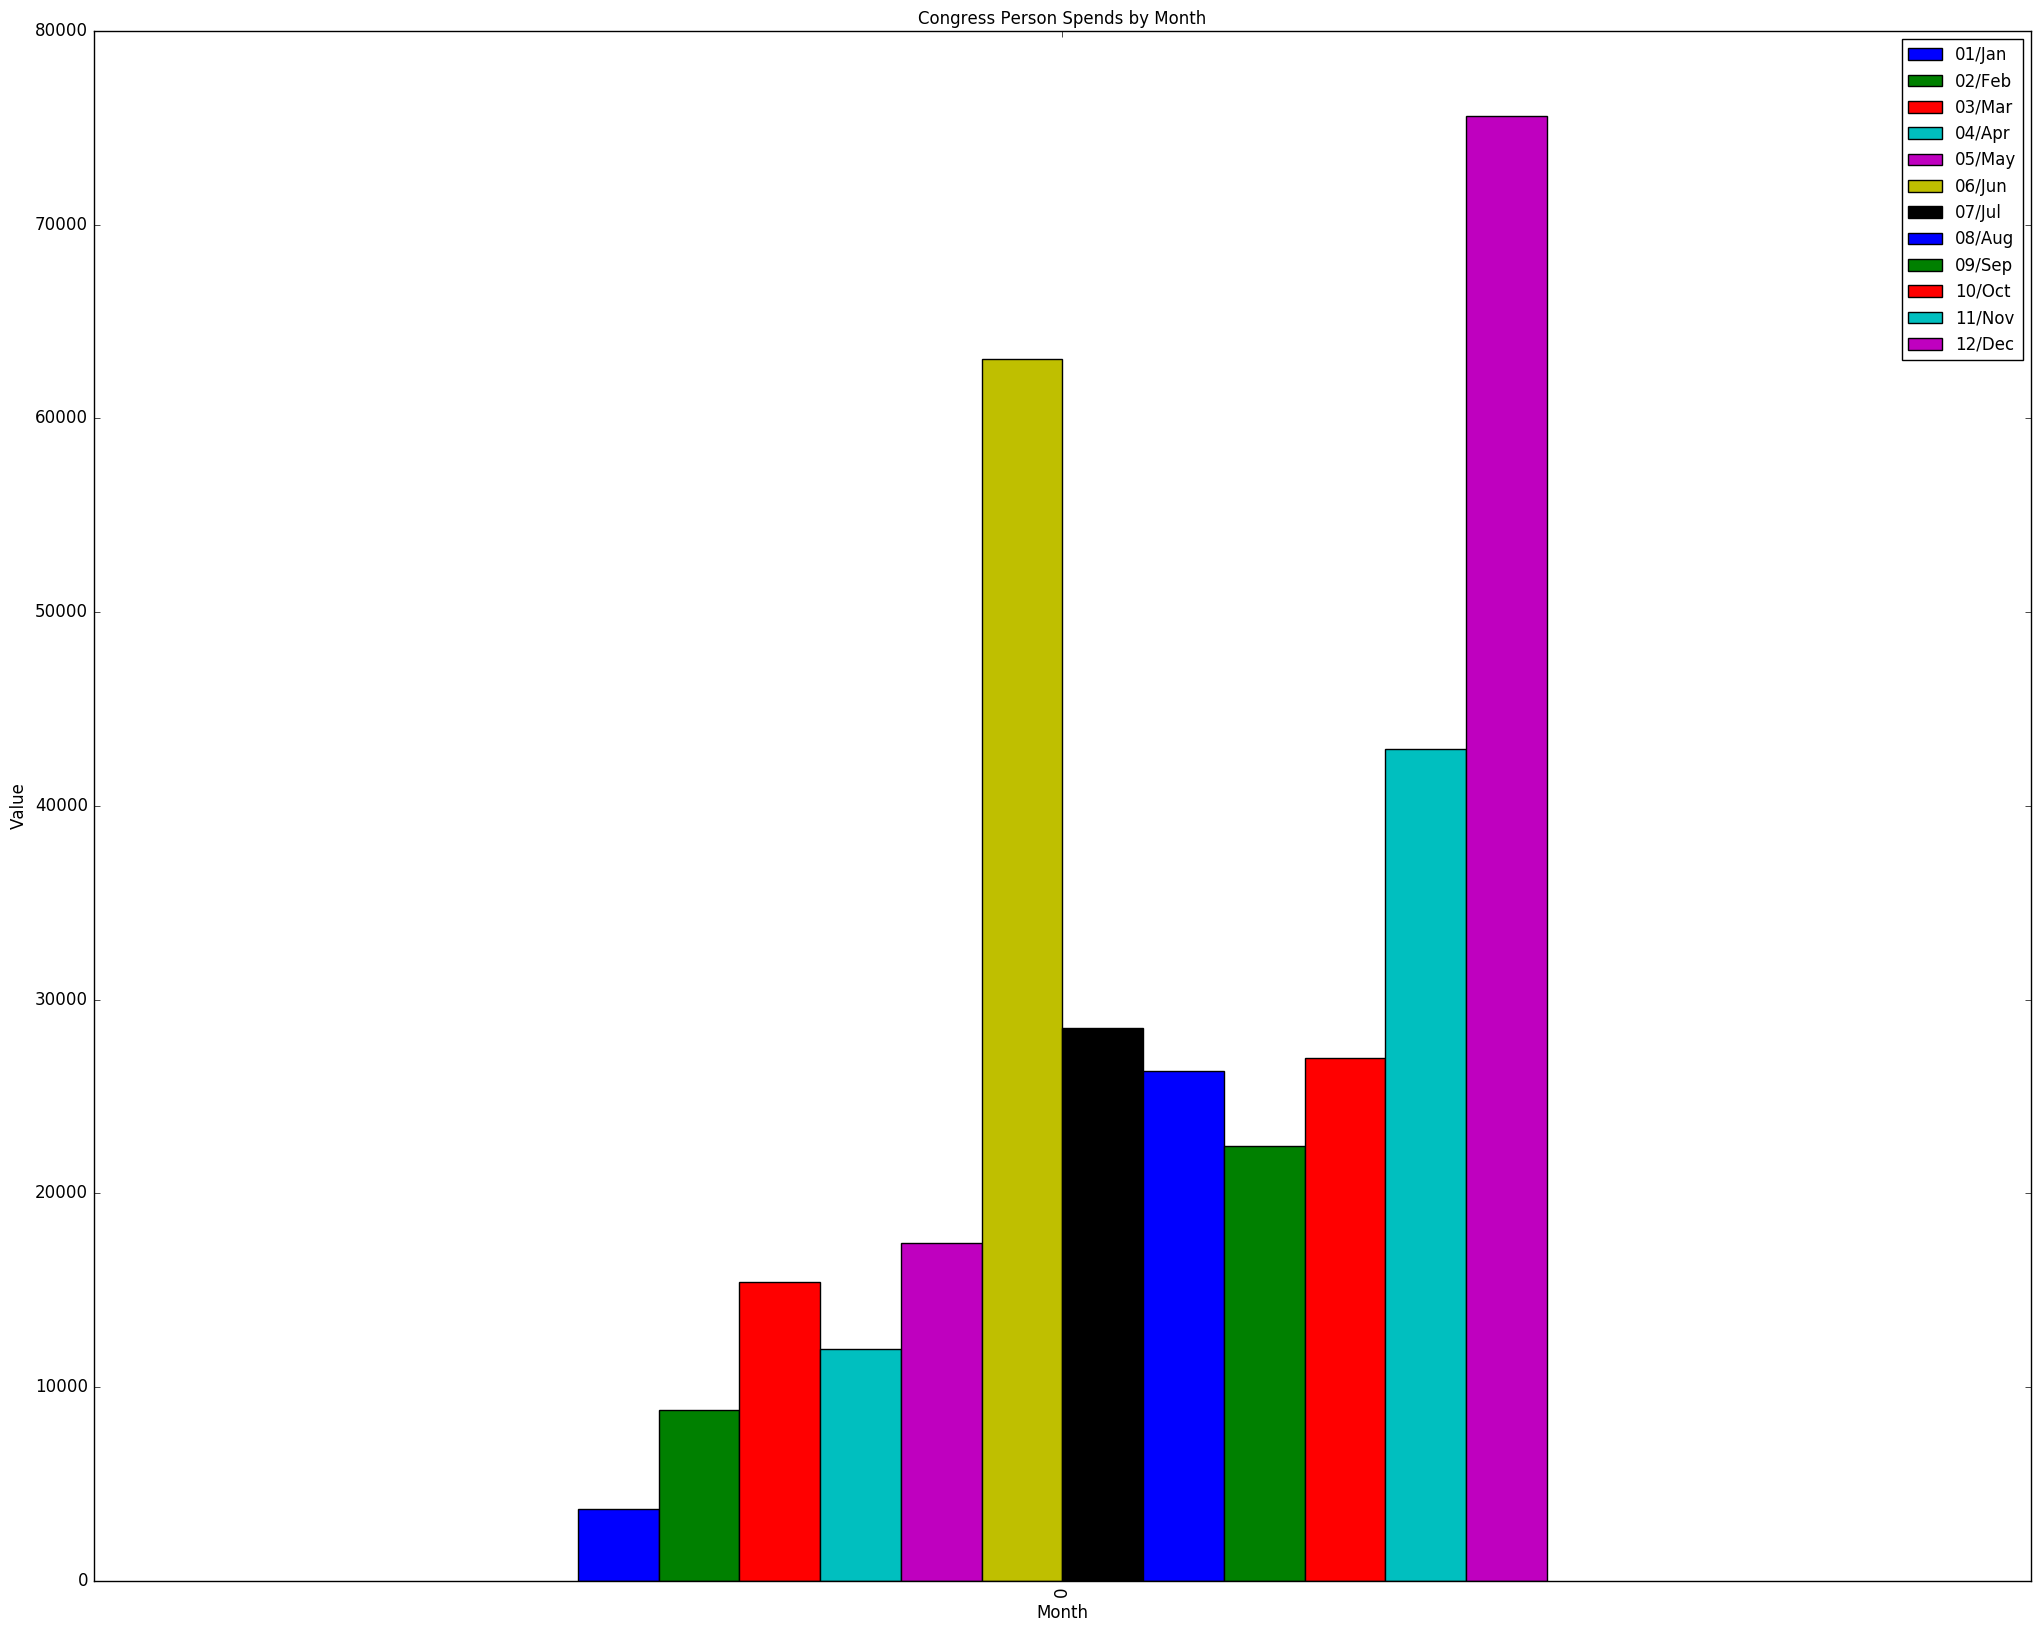

,01/Jan,02/Feb,03/Mar,04/Apr,05/May,06/Jun,07/Jul,08/Aug,09/Sep,10/Oct,11/Nov,12/Dec,name
0,3724.77,8838.2,15438.94,11972.93,17445.43,63042.14,28515.88,26315.27,22462.32,26983.72,42943.31,75621.39,[JAIR BOLSONARO]


In [16]:
def find_spends_by_month(df, applicant_id):
    '''
    Return a dataframe with the sum of values of spends by month
    of the congress person of "applicant_id"
    Parameters:
        - df: pandas dataframe to be sliced
        - applicant_id: unique id of the congress person
        
    Ex: find_spends_by_month(df, 731)
    Result dataframe contains:
        - 1/Jan sum
        - 2/Feb sum
        - 3/Mar sum
        - 4/Apr sum
        - 5/May sum
        - 6/Jun sum
        - 7/Jul sum
        - 8/Aug sum
        - 9/Sep sum
        - 10/Oct sum
        - 11/Nov sum
        - 12/Dec sum
        - name
    '''
    months={1:"Jan",
            2:"Feb",
            3:"Mar",
            4:"Apr",
            5:"May",
            6:"Jun",
            7:"Jul",
            8:"Aug",
            9:"Sep",
            10:"Oct",
            11:"Nov",
            12:"Dec"}
    df_applicant = df[df.applicant_id == applicant_id]
    result = {
        "name":df_applicant["congressperson_name"].unique()
    }
       
    for m in months.keys():
        data = df_applicant[df.month == m]
        result["{:>02}".format(m) + "/" + months[m]] = data.net_value.sum()
    
    df_final = pd.DataFrame([result])
     
    ax = df_final.plot(kind='bar', title ="Congress Person Spends by Month", figsize=(25, 20), legend=True, fontsize=12)
    ax.set_xlabel("Month", fontsize=12)
    ax.set_ylabel("Value", fontsize=12)
    plt.show()
    
    return pd.DataFrame([result])

find_spends_by_month(data, 731)

# Find spends: Congress Person per Subquotas

/Users/jucarmona/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


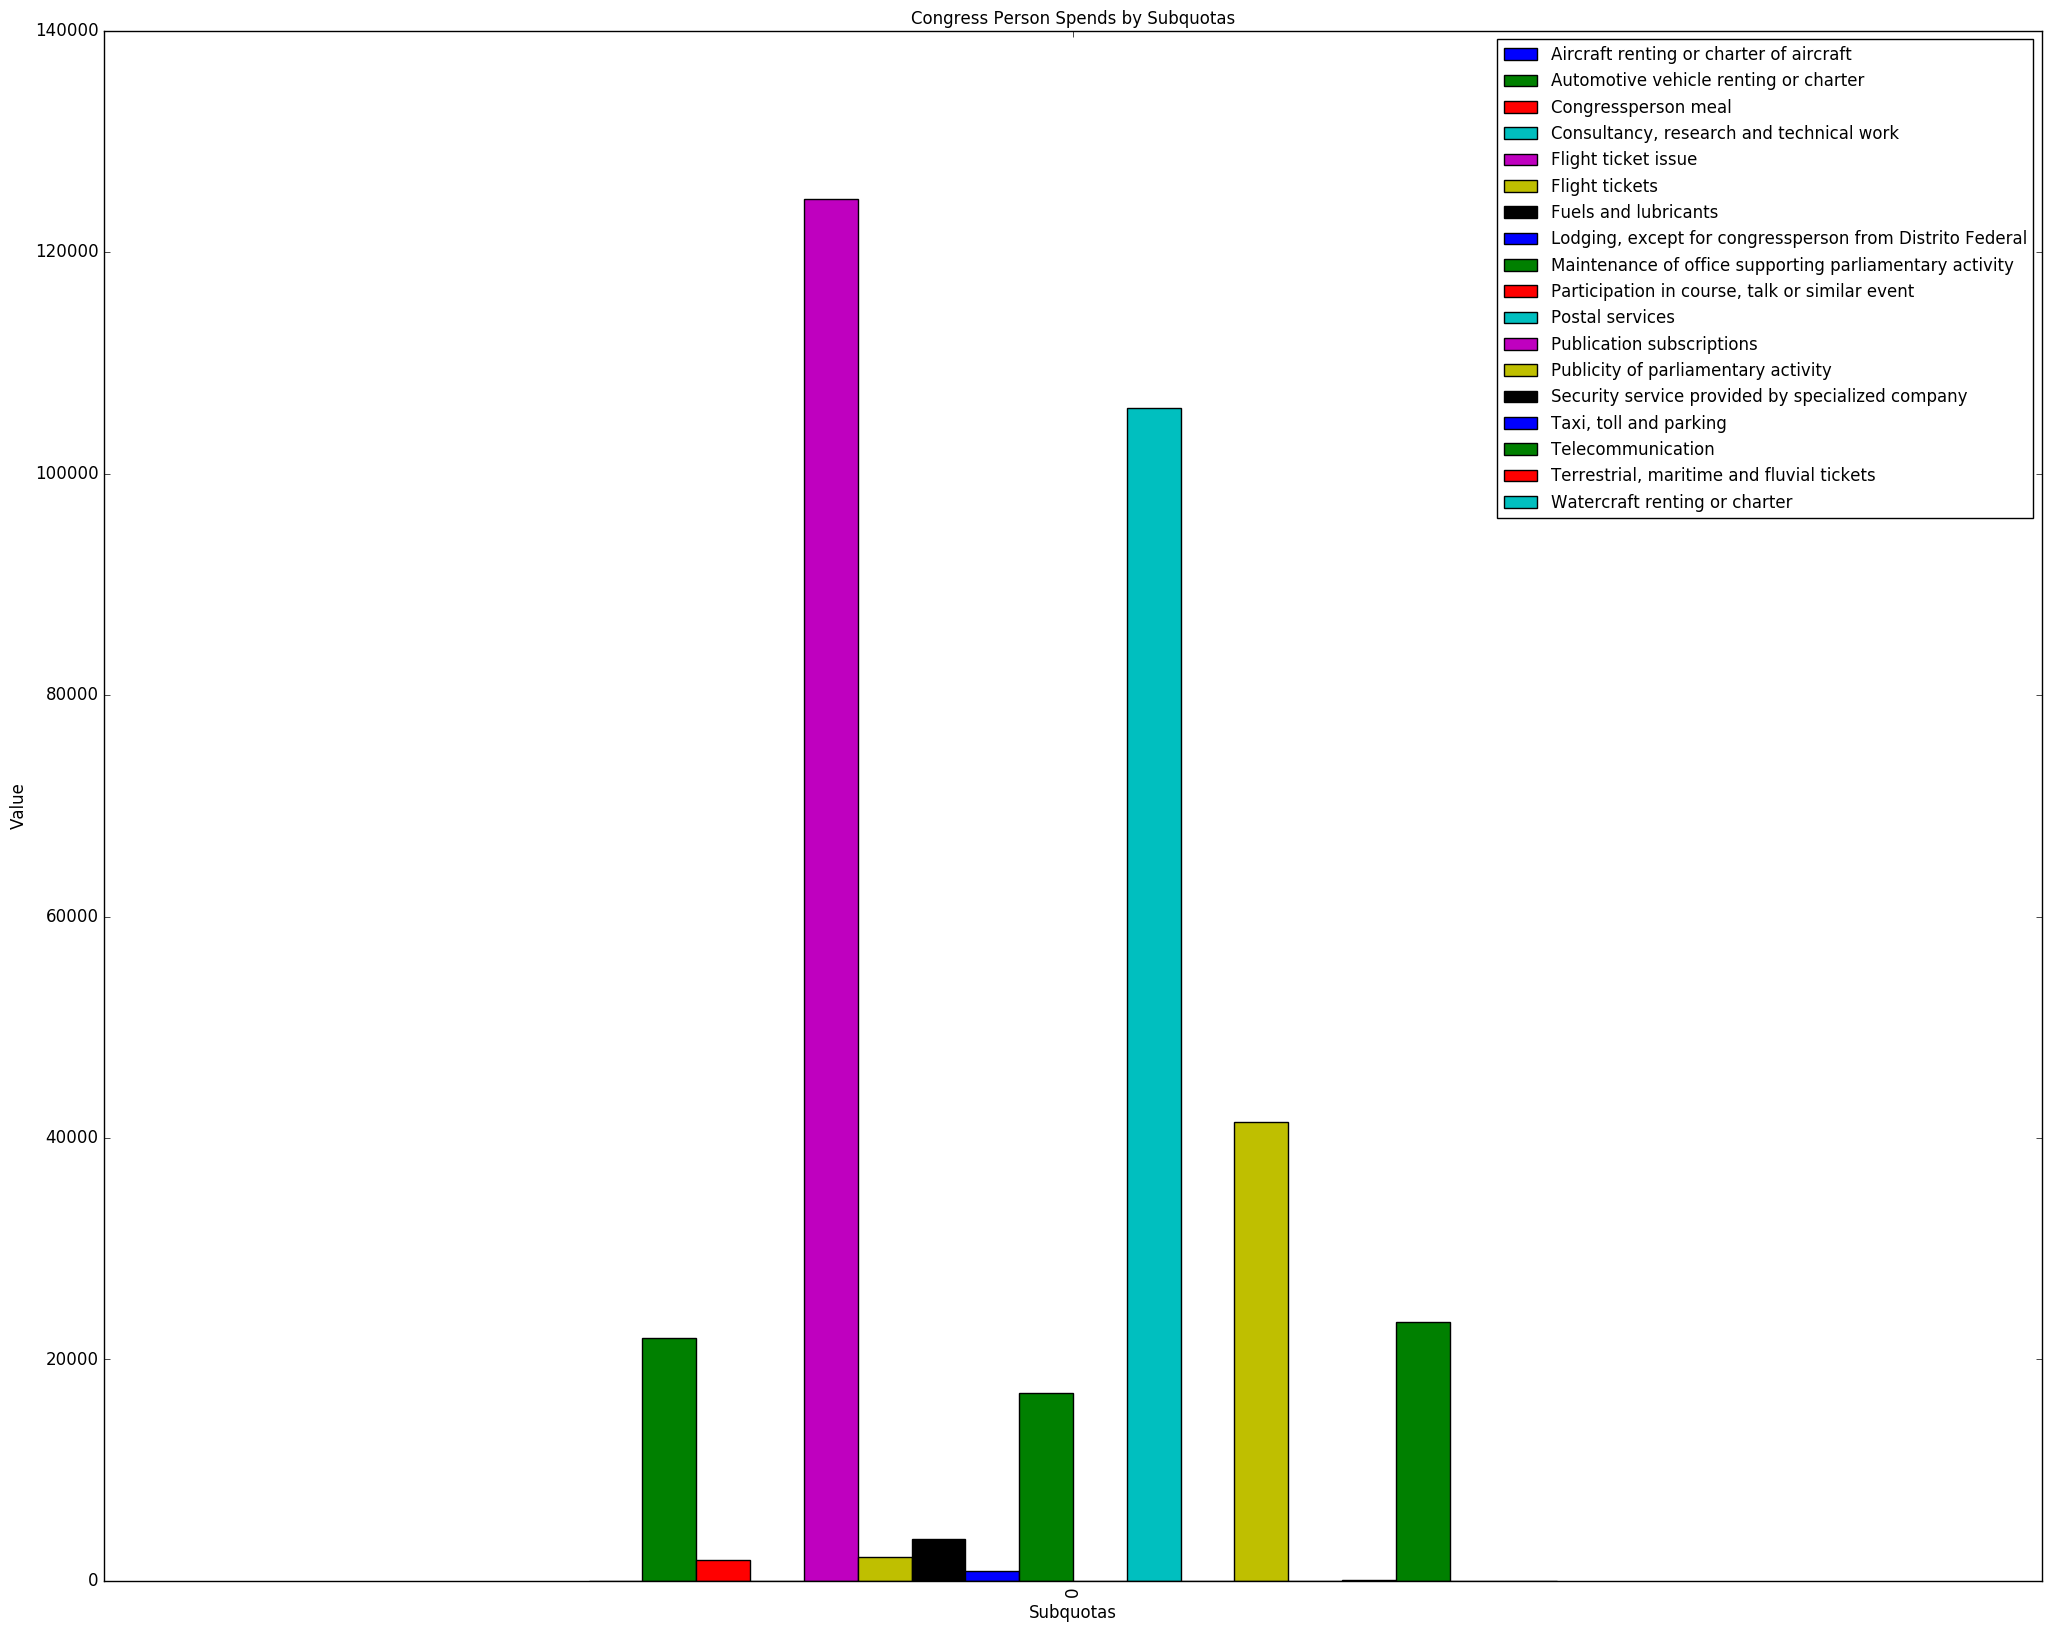

,Aircraft renting or charter of aircraft,Automotive vehicle renting or charter,Congressperson meal,"Consultancy, research and technical work",Flight ticket issue,Flight tickets,Fuels and lubricants,"Lodging, except for congressperson from Distrito Federal",Maintenance of office supporting parliamentary activity,"Participation in course, talk or similar event",Postal services,Publication subscriptions,Publicity of parliamentary activity,Security service provided by specialized company,"Taxi, toll and parking",Telecommunication,"Terrestrial, maritime and fluvial tickets",Watercraft renting or charter,name
0,0,21933.33,1891.74,0,124804.08,2177.99,3751.45,895.12,16994.93,0,105981.76,0,41428.2,0,94.0,23351.7,0,0,[JAIR BOLSONARO]


In [18]:
def find_spends_by_subquota(df, applicant_id):
    '''
    Return a dataframe with the sum of values of spends by subquotas
    of the congress person of "applicant_id"
    Parameters:
        - df: pandas dataframe to be sliced
        - applicant_id: unique id of the congress person
    '''
    df_applicant = df[df.applicant_id == applicant_id]
    result = {
        "name":df_applicant["congressperson_name"].unique()
    }
    
    for c in df["subquota_description"].unique():
        data = df_applicant[df.subquota_description == c]
        result[c] = data.net_value.sum()
    
    df_final = pd.DataFrame([result])
    ax = df_final.plot(kind='bar', title ="Congress Person Spends by Subquotas", figsize=(25, 20), legend=True, fontsize=12)
    ax.set_xlabel("Subquotas", fontsize=12)
    ax.set_ylabel("Value", fontsize=12)
    plt.show()
    return pd.DataFrame([result])

find_spends_by_subquota(data, 731)

/Users/jucarmona/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


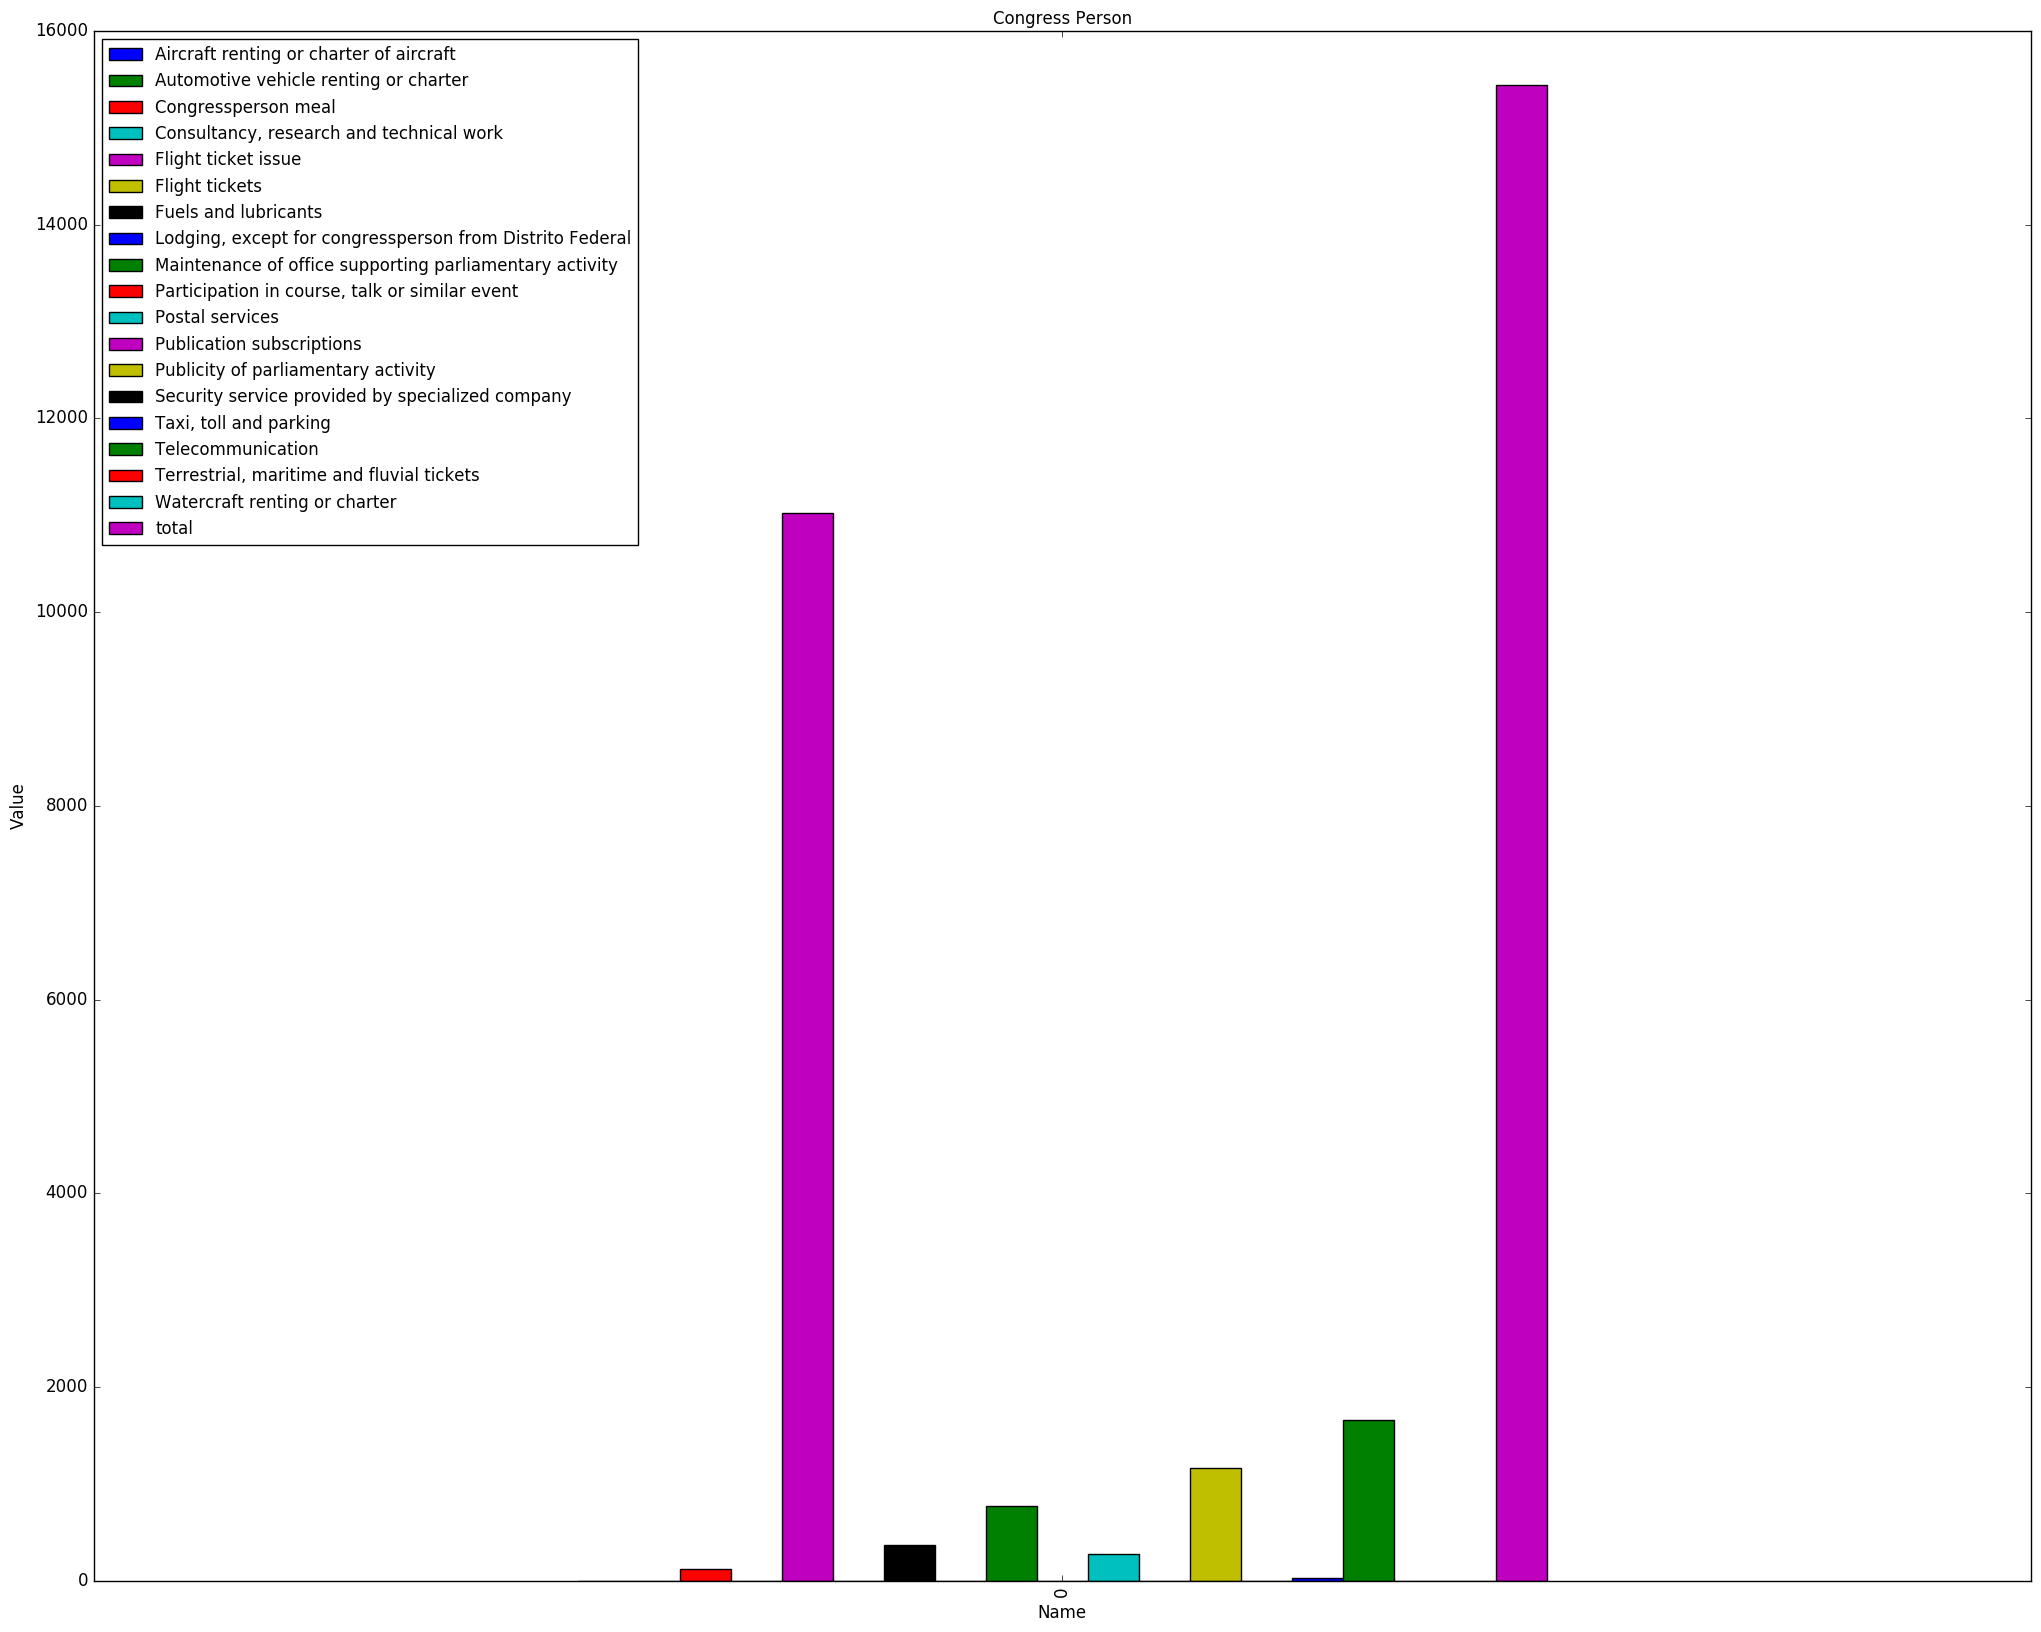

,Aircraft renting or charter of aircraft,Automotive vehicle renting or charter,Congressperson meal,"Consultancy, research and technical work",Flight ticket issue,Flight tickets,Fuels and lubricants,"Lodging, except for congressperson from Distrito Federal",Maintenance of office supporting parliamentary activity,"Participation in course, talk or similar event",Postal services,Publication subscriptions,Publicity of parliamentary activity,Security service provided by specialized company,"Taxi, toll and parking",Telecommunication,"Terrestrial, maritime and fluvial tickets",Watercraft renting or charter,name,total
0,0,0,119.19,0,11026.55,0,372.43,0,774.36,0,276.76,0,1169.9,0,34.0,1665.75,0,0,[JAIR BOLSONARO],15438.94


In [21]:
 def find_spends_by_subquota(df, applicant_id, month=None):
    '''
    Return a dataframe with the sum of values of spends by subquotas
    of the congress person of "applicant_id" and month "month"
    Parameters:
        - df: pandas dataframe to be sliced
        - applicant_id: unique id of the congress person
    '''
    df_applicant = df[df.applicant_id == applicant_id]
    
    result = {
        "name":df_applicant["congressperson_name"].unique(),
        "total": 0
        
    }
    if month != None:
        df_applicant = df_applicant[df_applicant.month==month]


    for c in df["subquota_description"].unique():
        data = df_applicant[df.subquota_description == c]
        result[c] = data.net_value.sum()
        result["total"] += result[c]
    
    df_final = pd.DataFrame([result])
    ax = df_final.plot(kind='bar', title ="Congress Person", figsize=(25, 20), legend=True, fontsize=12)
    ax.set_xlabel("Name", fontsize=12)
    ax.set_ylabel("Value", fontsize=12)
    plt.show()
    return pd.DataFrame([result])

find_spends_by_subquota(data, 731, 3)

# Find spends: all congress people 

In [35]:
def find_sum_of_values(df, aggregator, property):
    '''
    Return a dataframe with the statistics of values from "property"
    aggregated by unique values from the column "aggregator"
    Parameters:
        - df: pandas dataframe to be sliced
        - aggregator: dataframe column that will be
                      filtered by unique values
        - property: dataframe column containing values to be summed
    Ex: find_sum_of_values(data, 'congressperson_name', 'net_value')
    Result dataframe contains (for each aggregator unit):
        - property sum
        - property mean value
        - property max value
        - property mean value
        - number of occurences in total
    '''

    total_label = '{}_total'.format(property)
    max_label = '{}_max'.format(property)
    mean_label = '{}_mean'.format(property)
    min_label = '{}_min'.format(property)

    result = {
        'occurences': [],
        aggregator: df[aggregator].unique(),
        max_label: [],
        mean_label: [],
        min_label: [],
        total_label: [],

    }

    for item in result[aggregator]:
        if isinstance(df[aggregator].iloc[0], str):
            item = str(item)
        values = df[df[aggregator] == item]
        property_total = int(values[property].sum())
        occurences = int(values[property].count())

        result[total_label].append(property_total)
        result['occurences'].append(occurences)
        result[mean_label].append(property_total/occurences)
        result[max_label].append(np.max(values[property]))
        result[min_label].append(np.min(values[property]))

    return pd.DataFrame(result).sort_values(by=aggregator)

df = find_sum_of_values(data, "congressperson_name", "net_value")
df[:10]

,congressperson_name,net_value_max,net_value_mean,net_value_min,net_value_total,occurences
73,ARNALDO JORDY,19500.0,444.794401,-2025.73,508400,1143
148,CHICO LOPES,11910.0,698.172702,-1064.93,501288,718
204,EDIO LOPES,16500.0,830.299845,-2449.03,537204,647
352,JHONATAN DE JESUS,88500.0,1876.854671,-984.33,542411,289
481,MANOEL JUNIOR,18000.0,958.564054,-1531.93,501329,523
514,MARCOS ROGÉRIO,26770.0,731.816619,0.31,510808,698
572,NILTON CAPIXABA,16520.0,1347.524934,-390.54,513407,381
717,SHÉRIDAN,40250.0,1735.278351,1.40,504966,291
718,SIBÁ MACHADO,16000.0,1093.451404,-9240.77,506268,463
766,VINICIUS GURGEL,10579.3,1542.417910,-1199.64,516710,335


# Finding congress people that spent more than 500 thousand per year

In [38]:
df = df[df.net_value_total > 500000]
df

,congressperson_name,net_value_max,net_value_mean,net_value_min,net_value_total,occurences
73,ARNALDO JORDY,19500.0,444.794401,-2025.73,508400,1143
148,CHICO LOPES,11910.0,698.172702,-1064.93,501288,718
204,EDIO LOPES,16500.0,830.299845,-2449.03,537204,647
352,JHONATAN DE JESUS,88500.0,1876.854671,-984.33,542411,289
481,MANOEL JUNIOR,18000.0,958.564054,-1531.93,501329,523
514,MARCOS ROGÉRIO,26770.0,731.816619,0.31,510808,698
572,NILTON CAPIXABA,16520.0,1347.524934,-390.54,513407,381
717,SHÉRIDAN,40250.0,1735.278351,1.40,504966,291
718,SIBÁ MACHADO,16000.0,1093.451404,-9240.77,506268,463
766,VINICIUS GURGEL,10579.3,1542.417910,-1199.64,516710,335


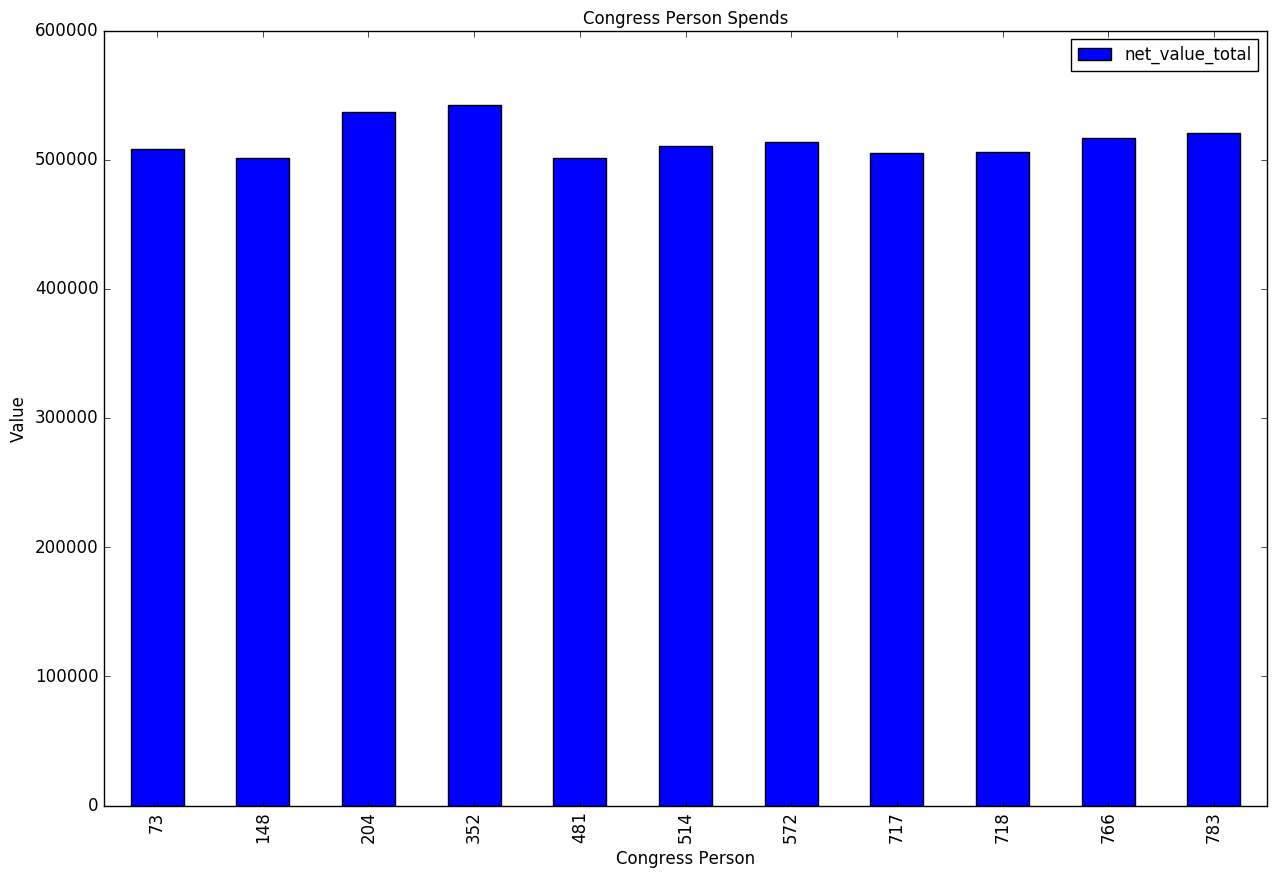

In [39]:
ax = df[["net_value_total"]].plot(kind='bar', title ="Congress Person Spends", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Congress Person", fontsize=12)
ax.set_ylabel("Value", fontsize=12)
plt.show()